# Rajaram Gautam

# Zillow Projection on Tax Value of Single Family Residential Properties Having Transction in 2017


# Zillow Regression Project for Tax Value Prediction of Single Family Residential Properties
- Rajaram Gautam           - December 13, 2021          - Submitted To: Zillow Data Science Team

# Project Summary

# Business Goals
- To construct a Machine Learning Regression Model that can predict the tax value of Single Family Residential Properties using various attributes of the properties that had transaction date in 2017.
- To find key drivers of the property value for the Single Family Residential Properties.
- Deliver a report that data science team can read and understands about the procedures taken to come to conclusion.
- To make recommendation based on my works what would work and what not in the predictions of the home tax value.
- To know the county and state of the properties that had transaction in 2017.

# Executive Summary
After modeling the zillow data using five features (bathrooms, bedrooms, total living area, lot size, pools and garage area), the Polynomial Model with degree 2 produced the best results with RMSE values of 208506, 211676 and 213560 for train, test and validate dataset. It is improvement by 14.3% over the baseline model (when comparing training data set). It was improved by 13.21 % for validate datadet. Therefore, these models do show that they could be used to produce a prediction for home values; however, the error is still high at over $211,676 RSME. I would recommed further cleaning data for a reliable predictor for tax value in order to use this model.


# Deliverables
- A report in the form of presnetation and live presentation of the work via zoom.
- Github Repository with a complete readme.md, a final report(.ipynb), acquire, prepare, explore, and model modules made to make workflow in project pipeline easy.
- The report will summarize the findings about the drivers of tax value of the single family residential properties with suitable visualizations.

# Intial Questions
- Is there positive correlation between tax value of single family residential property and total living area?
- Is there positive correlation between tax value of single family residential property and bathrooms?
- Is there positive correlation between tax value of single family residential property and bedrooms?
- Is there positive correlation between tax value of single family residential property and pools?
- Is there positive correlation between tax value of single family residential property and garage area?
- Is there positive correlation between tax value of single family residential property and lot size?
- Is there negative correlation between tax value of single family residential property and age of house?


# Data dictionary

|Index | Column Name | Description
|---|---|---|---|---|
|0 |  bedrooms          | Number of Bedrooms                                 
|1 |  bathrooms         | Number of bathrooms                                
|2 |  sqft              | Square footage of the house                        
|3 |  tax_value         | Value of the property                             
|4 |  year_built        | Year property was built                            
|5 |  tax_amount        | Tax amount per property                            
|6 |  fips              | Federal Information Processing Series (FIPS) Codes 
|7 |  zipcode           | Zipcode                                            
|8 |  zipcode_avg_price | Average home price per zipcode                     
|9 |  county            | County Name                                        
|10|  state             | State Name                                         
|11|  garage_area       | Area of Garage                                     
|12|  transactiondate.  | Transaction date for the property                 

For Full Data Dictionary for Zillow database that we are using here, please follow the ling below.


# Project Specifications

# Plan:
- Single Family Residential Properties data to extracted from Zillow database provided with suitable attritues that will help us in determing tax value of the house.
- Preparare: Prepare data to ensure that data format of each attriutes selected will fit into our model, remove outliers, handle NaN in data properly using best judgement to so that our model will give give us less error.
- Explore: Explore the data for attrubte that will have possible relationship with tax value and remove the attributes in that have colinearly dependent to each other. 
- Model : We will use Linear Regression Model like Ordinar Least Squares, LASSO + LARS, Polynomial Regression Generalized Linear Model (TweedieRegressor)
- Iterate : We will iterate the process for various model with different values of model parameter to choose the best model for our test data, to make better predictions.

# Acquire
- I created a series of functions to acquire and clean the zillow data, which are located in the zillow_wrangle.py file. They take in all of the single unit properties (code 261 from the propertylandusetypeid column on the properties_2017 table in the zillow data set) that were sold between 1 May and 1 Sept of 2017 (based on the predictions_2017 table) into a Pandas dataFrame.
- I have teken a column for zipcodes and modified it to average home price per zipcode, as well as the county and sate name.

# Prep
- Top and Bottom of outliers were removed so that when we take median as baseline it will give us less error.
- Features and columns that seems to have no influence in tax value has not be extracted and even those of extracted some are removed as they seemed irrelevant.
- The remaining data, aside from the target, was scaled using a min-max scaler

# Explore
- Scatterplots with trend lines are used to look for obvious correlations.
- Boxplots are used to show the distributions and possible outliers even after preparing.
- A heatmap was generated to show correlation strength between features
- Statistical tests were used to confirm correlation between the target and other features

# Model & Evaluate
- The following models were used:
 - Baseline (using mean)
 - Ordinary Least Squares
 - LASSO + LARS
 - Generalized Linear Model
 - Polynomial 2nd Degree
 - Polynomial 3rd Degree

# Details on FIPS Code
https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697


### Reproduce My Project

You will need your own env file with database credentials along with all the necessary files listed below to run my final project notebook. 
- Read this README.md
- Download the aquire_new.py, prep_new.py, model_new.py final.ipynb files into your working directory
- Add your own env file to your directory. (user, password, host)
- Run the final_report.ipynb notebook

# Conclusion
After modeling the zillow data using five features (bathrooms, bedrooms, total living area, lot size, pools and garage area), the Polynomial Model with degree 2 produced the best results with RMSE values of 208506, 211676 and 213560 for train, test and validate dataset.  It is improvement by 14.3% over the baseline model (when comparing training data set). It was improved by 13.21 % for validate datadet. Therefore, these models do show that they could be used to produce a prediction for home values; however, the error is still high at over $211,000 RSME. I would recommed further cleaning data for a reliable predictor for tax value in order to use this model.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing


# Modeling section
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from scipy import stats 



import seaborn as sns
import os
from env import host, user, password
import acquire_new as an
import prep_new as pn
import model_new as mn

### Acquire

In [2]:
df = an.new_zillow_data()
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,poolcnt,regionidzip,yearbuilt,latitude,longitude,taxvaluedollarcnt,garagetotalsqft,regionidcounty,regionidcity,transactiondate
0,3.5,4.0,3100.0,6059.0,4506.0,NaN,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,11013.72
1,1.0,2.0,1465.0,6111.0,12647.0,NaN,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,5672.48
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,6488.30
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,NaN,3101.0,396551.0,1777.51
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,NaN,3101.0,47019.0,9516.26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52441 non-null  float64
 1   bedroomcnt                    52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   fips                          52441 non-null  float64
 4   lotsizesquarefeet             52072 non-null  float64
 5   poolcnt                       11096 non-null  float64
 6   regionidzip                   52415 non-null  float64
 7   yearbuilt                     52325 non-null  float64
 8   latitude                      52441 non-null  float64
 9   longitude                     52441 non-null  float64
 10  taxvaluedollarcnt             52440 non-null  float64
 11  garagetotalsqft               18015 non-null  float64
 12  regionidcounty                52441 non-null  float64
 13  r

In [4]:
# Renaming columns

df= df.rename(columns = {'bathroomcnt' : 'bathrooms',
                     'bedroomcnt' : 'bedrooms',
                     'calculatedfinishedsquarefeet' : 'total_living_area',
                     'lotsizesquarefeet' : 'lot_size',
                     'poolcnt' : 'pools',
                     'yearbuilt' : 'year_built',
                     'taxvaluedollarcnt' : 'tax_value',
                     'garagetotalsqft' : 'garage_area',
                    'regionidzip' : 'zip_code',
                         
                     })

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          52441 non-null  float64
 1   bedrooms           52441 non-null  float64
 2   total_living_area  52359 non-null  float64
 3   fips               52441 non-null  float64
 4   lot_size           52072 non-null  float64
 5   pools              11096 non-null  float64
 6   zip_code           52415 non-null  float64
 7   year_built         52325 non-null  float64
 8   latitude           52441 non-null  float64
 9   longitude          52441 non-null  float64
 10  tax_value          52440 non-null  float64
 11  garage_area        18015 non-null  float64
 12  regionidcounty     52441 non-null  float64
 13  regionidcity       51404 non-null  float64
 14  transactiondate    52437 non-null  float64
dtypes: float64(15)
memory usage: 6.0 MB


In [6]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate
0,3.5,4.0,3100.0,6059.0,4506.0,NaN,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,11013.72
1,1.0,2.0,1465.0,6111.0,12647.0,NaN,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,5672.48
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,6488.30
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,NaN,3101.0,396551.0,1777.51
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,NaN,3101.0,47019.0,9516.26


In [7]:
# Retrieving county id in zillow dataset 
df.regionidcounty.unique()

array([1286., 2061., 3101.])

In [8]:
df.shape

(52441, 15)

### Acquire Takeways

- Not Null Count is different for each column, we will make them same by deleting rows.
- For Houses with NaN for pools, we assume it has no pool and make it 0.
- For Houses with Nan for garage_area, we will assume they have no garge, so make its garage_area 0.
- Out of all these after doing my exploration of data I choose to keep bedrooms, bathrppms, total_living_area, tax_value, year_built, garage_area, fips, zipcode, county only.

### Prepare

Details on wrangle_zillow on prep_new.py,

In [9]:
df = pn.wrangle_zillow(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51883 entries, 0 to 52440
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          51883 non-null  float64
 1   bedrooms           51883 non-null  float64
 2   total_living_area  51883 non-null  float64
 3   fips               51883 non-null  float64
 4   lot_size           51883 non-null  float64
 5   pools              51883 non-null  float64
 6   zip_code           51883 non-null  float64
 7   year_built         51883 non-null  float64
 8   tax_value          51883 non-null  float64
 9   garage_area        51883 non-null  float64
 10  regionidcounty     51883 non-null  float64
 11  age                51883 non-null  float64
dtypes: float64(12)
memory usage: 5.1 MB


In [11]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,tax_value,garage_area,regionidcounty,age
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,96978.0,1998.0,1023282.0,633.0,1286.0,19.0
1,1.0,2.0,1465.0,6111.0,12647.0,0.0,97099.0,1967.0,464000.0,0.0,2061.0,50.0
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,564778.0,440.0,1286.0,55.0
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,145143.0,0.0,3101.0,47.0
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,773303.0,0.0,3101.0,67.0


In [12]:
df.shape

(51883, 12)

### Visualization Exploration

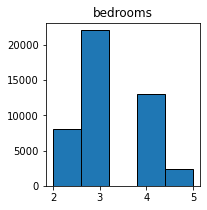

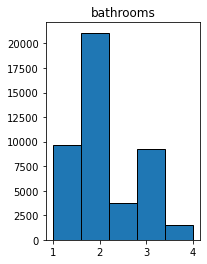

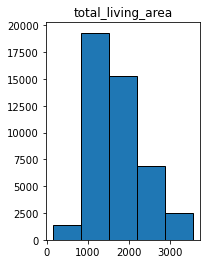

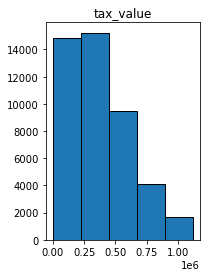

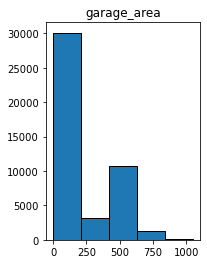

<Figure size 1152x288 with 0 Axes>

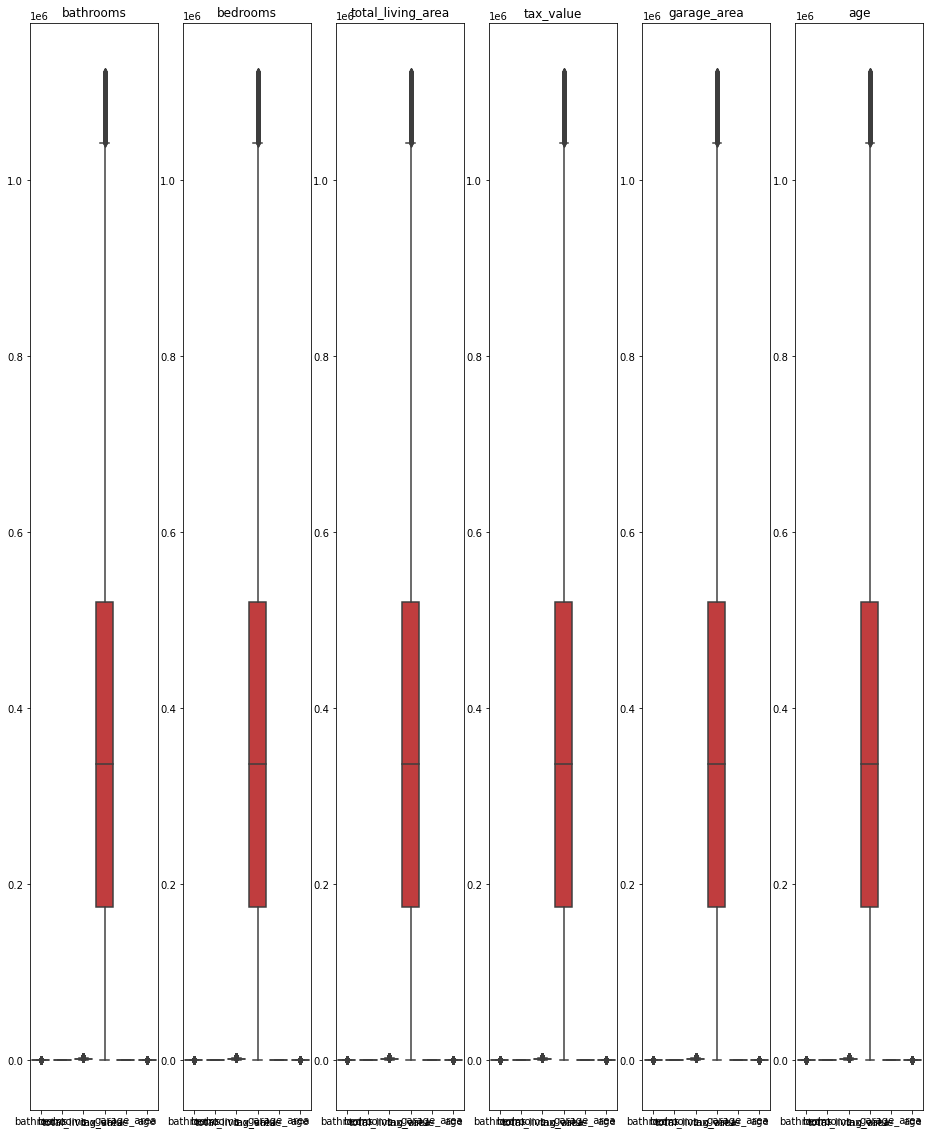

In [13]:
# Removing Possible outliers from dataframes and showing histrogram and boxplot
df = pn.prepare_zillow(df)

In [14]:
df.shape

(45320, 12)

In [15]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,tax_value,garage_area,regionidcounty,age
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,96978.0,1998.0,1023282.0,633.0,1286.0,19.0
1,1.0,2.0,1465.0,6111.0,12647.0,0.0,97099.0,1967.0,464000.0,0.0,2061.0,50.0
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,564778.0,440.0,1286.0,55.0
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,145143.0,0.0,3101.0,47.0
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,773303.0,0.0,3101.0,67.0


In [16]:
# Checking for if we have any columns with null values
df.isnull().sum()

bathrooms            0
bedrooms             0
total_living_area    0
fips                 0
lot_size             0
pools                0
zip_code             0
year_built           0
tax_value            0
garage_area          0
regionidcounty       0
age                  0
dtype: int64

# Countywise distribution of tax value of the Single Family Properties sold in 2017

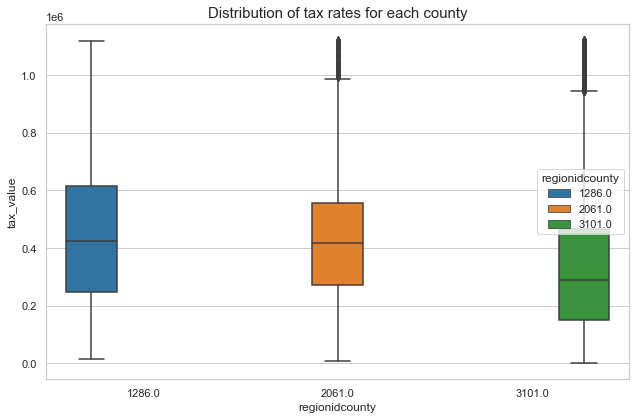

In [17]:
# Boxplot for tax value of single family residential properties sold in 2017 for three county

sns.set_theme(style="whitegrid")
plt.figure(figsize = (9,6))
sns.boxplot(data=df,x="regionidcounty", y="tax_value", hue="regionidcounty", palette=('tab10'))
plt.title("Distribution of tax rates for each county", fontsize = 15)
plt.tight_layout()
plt.show()

In [18]:
# Dropping unnecessary columns
df = df.drop(columns = ['year_built', 'fips', 'zip_code', 'regionidcounty'])

In [19]:
# splitting df into train, test, validate
train, test, validate = pn.wrangle_zillow_split(df)

In [20]:
print(train.shape)
print(validate.shape)
print(test.shape)

(25379, 8)
(9064, 8)
(10877, 8)


In [21]:
train.head()

,bathrooms,bedrooms,total_living_area,lot_size,pools,tax_value,garage_area,age
34061,3.0,4.0,2542.0,5200.0,1.0,689904.0,483.0,49.0
13825,2.0,2.0,1309.0,2193.0,0.0,83206.0,0.0,51.0
40829,1.0,3.0,1098.0,4999.0,0.0,83365.0,0.0,65.0
40232,2.0,3.0,1834.0,7662.0,0.0,270690.0,0.0,61.0
35318,3.0,5.0,2905.0,19233.0,0.0,317640.0,0.0,42.0


### Takeaways
- By Removing outliers and droping entries with NaN and absurb meaning we dropped 14 percent of the data extracted from our database. It is better to clean the data as much as possible to make more accurate model that can predict the tax value of the house. 
- Still there are outliers in data set we will be using despite the relatively restrictive 1.5 * IQR setting for the upper/lower boundary
- Eventhough I have extracted many attributes from zillow database for my prediction, I dropped lots of them after univariate exploration of data.

# Scaling

In [22]:
# Split into x / y | features / target

# Setup X and y
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [23]:
X_train.head()

,bathrooms,bedrooms,total_living_area,lot_size,pools,garage_area,age
34061,3.0,4.0,2542.0,5200.0,1.0,483.0,49.0
13825,2.0,2.0,1309.0,2193.0,0.0,0.0,51.0
40829,1.0,3.0,1098.0,4999.0,0.0,0.0,65.0
40232,2.0,3.0,1834.0,7662.0,0.0,0.0,61.0
35318,3.0,5.0,2905.0,19233.0,0.0,0.0,42.0


###### After Visualization in exploration, I choose to go wiith MinMaxScaler

Text(0.5, 1.0, 'Scaled')

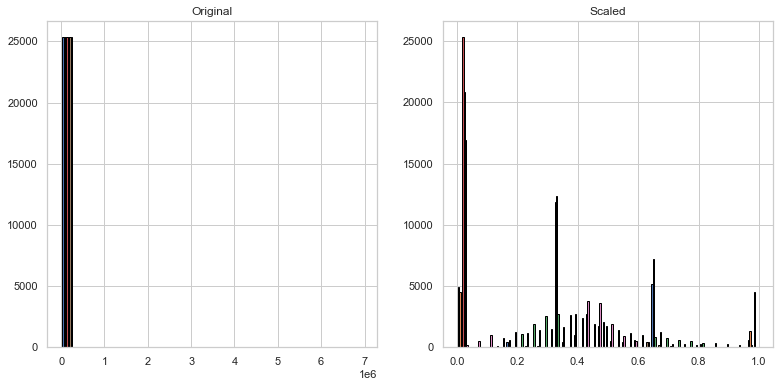

In [24]:
# MinMax Scaling
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### Exploration

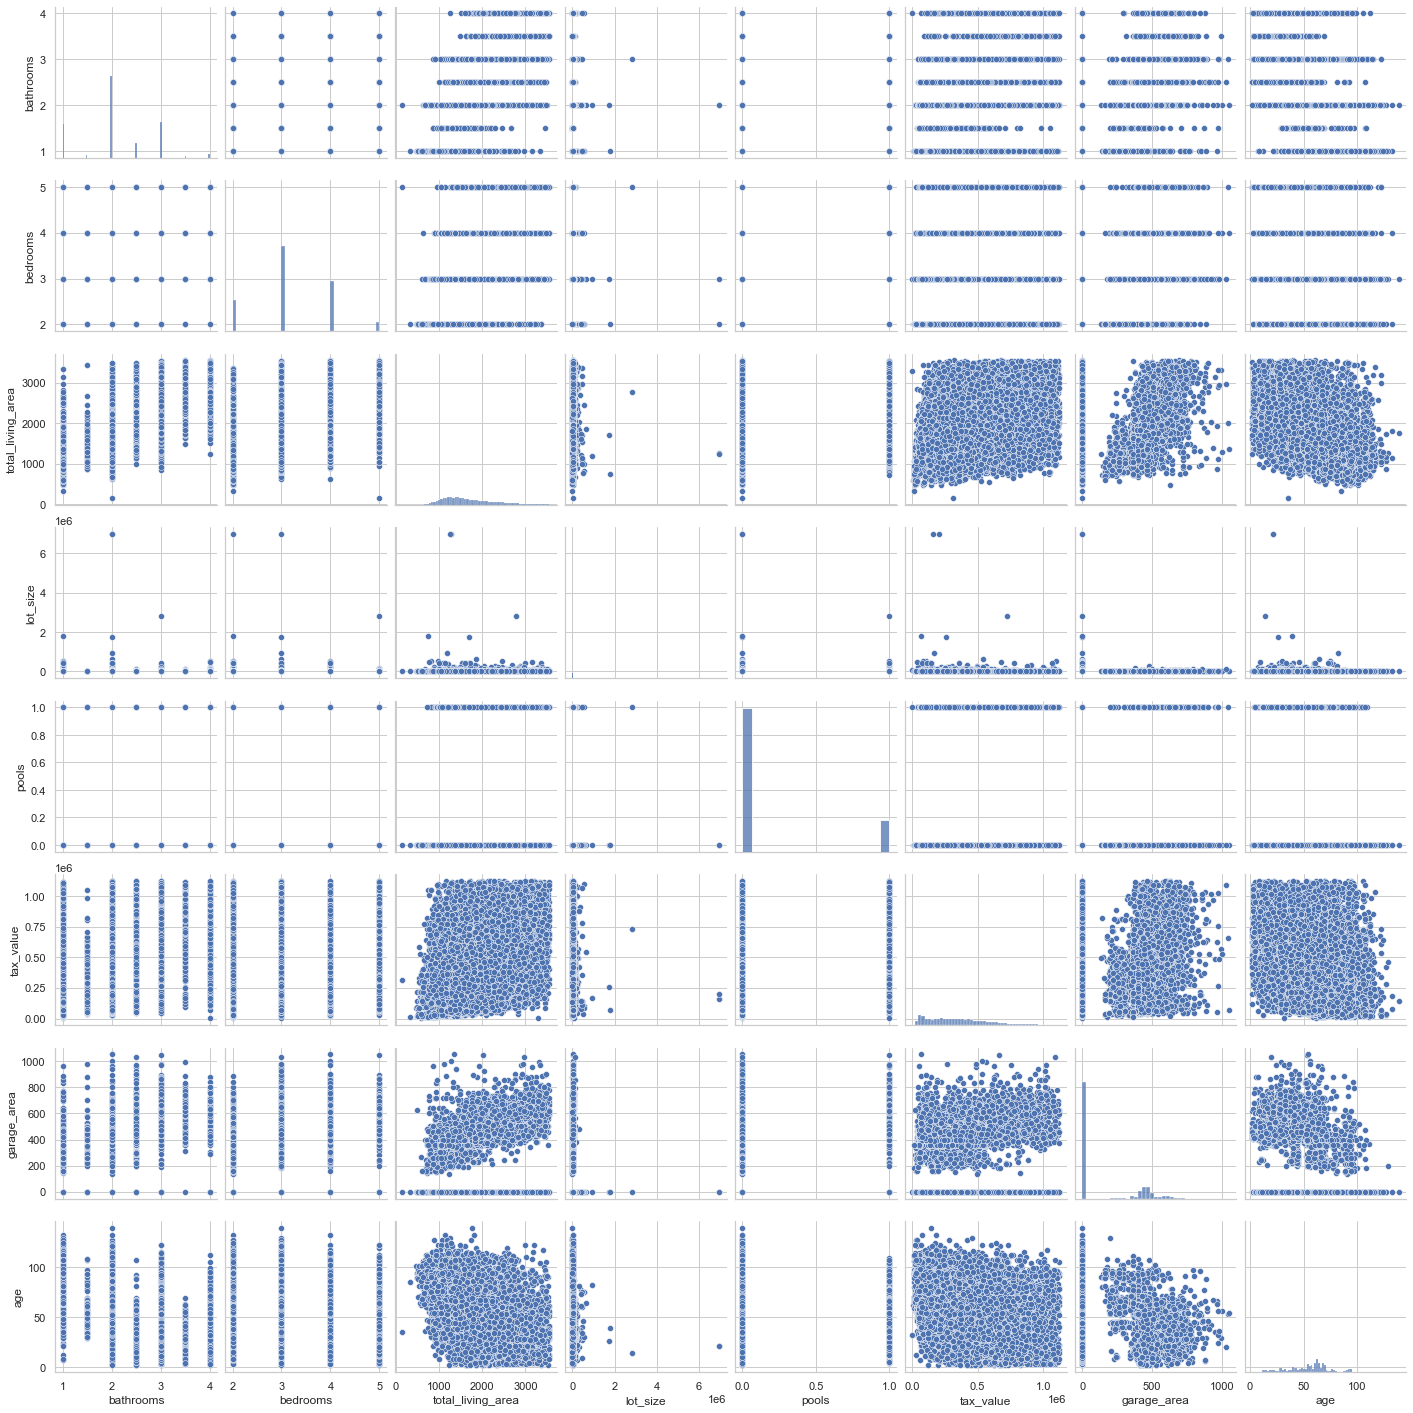

In [25]:
# Pairplot for all attributes of train dataset
sns.pairplot(train)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25379 entries, 34061 to 1256
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          25379 non-null  float64
 1   bedrooms           25379 non-null  float64
 2   total_living_area  25379 non-null  float64
 3   lot_size           25379 non-null  float64
 4   pools              25379 non-null  float64
 5   tax_value          25379 non-null  float64
 6   garage_area        25379 non-null  float64
 7   age                25379 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


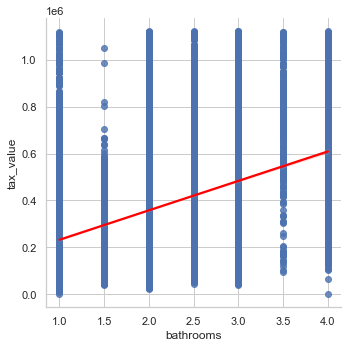

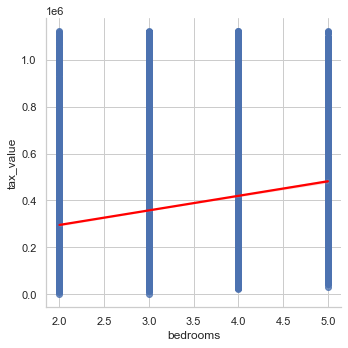

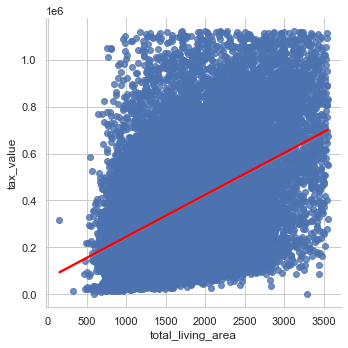

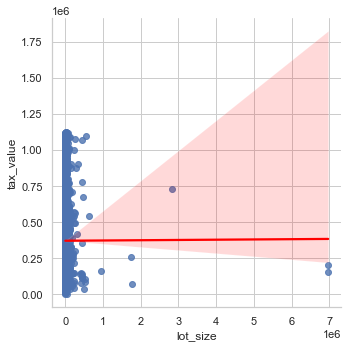

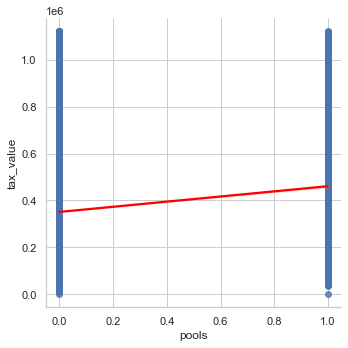

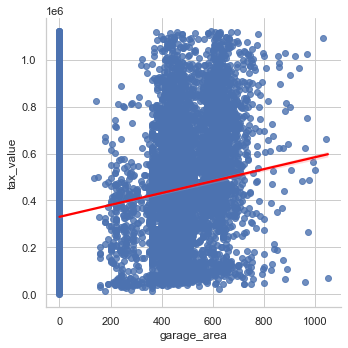

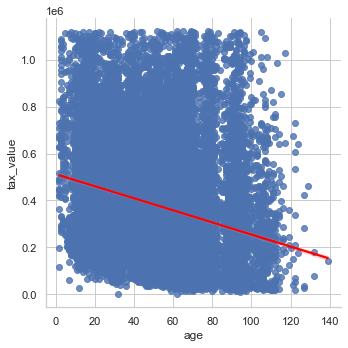

In [27]:
col_list = ['bathrooms', 'bedrooms', 'total_living_area', 'lot_size', 'pools', 'garage_area', 'age']
for col in col_list:
    sns.lmplot(x=col, y="tax_value", data=train, line_kws={'color': 'red'})
    plt.show()

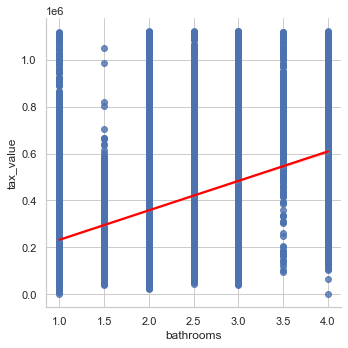

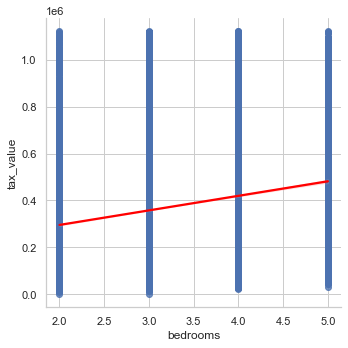

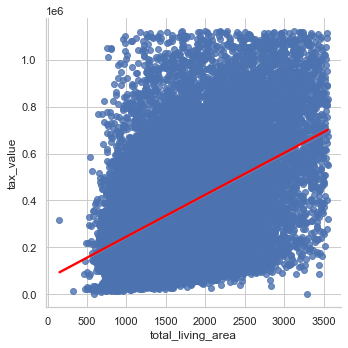

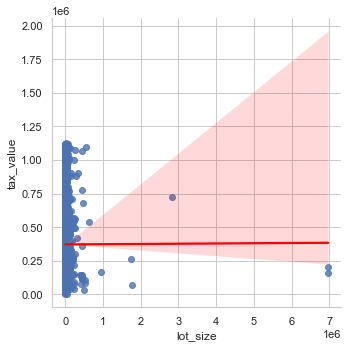

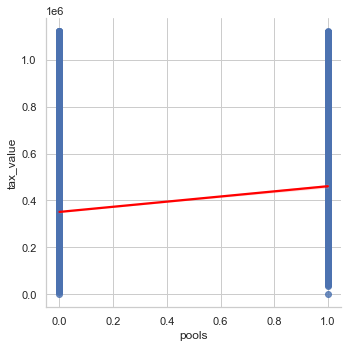

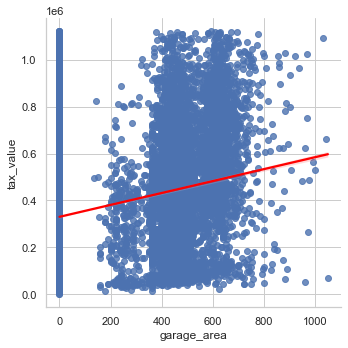

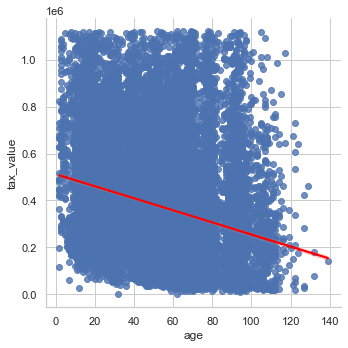

In [28]:
col_list = ['bathrooms', 'bedrooms', 'total_living_area', 'lot_size', 'pools', 'garage_area', 'age']
for col in col_list:
    sns.lmplot(x=col, y="tax_value", data=train, line_kws={'color': 'red'})
    plt.show()

In [29]:
# Create the correlation matrix for all attrubutes of house in train dataset.

zillow_corr = train.corr()
zillow_corr

,bathrooms,bedrooms,total_living_area,lot_size,pools,tax_value,garage_area,age
bathrooms,1.000000,0.575830,0.774251,0.017545,0.228638,0.373879,0.254250,-0.554166
bedrooms,0.575830,1.000000,0.601222,0.002622,0.207283,0.201151,0.221955,-0.363516
total_living_area,0.774251,0.601222,1.000000,0.024365,0.287007,0.447028,0.290850,-0.488460
lot_size,0.017545,0.002622,0.024365,1.000000,0.013378,0.000503,-0.018854,-0.030884
pools,0.228638,0.207283,0.287007,0.013378,1.000000,0.172612,0.072012,-0.089613
tax_value,0.373879,0.201151,0.447028,0.000503,0.172612,1.000000,0.242408,-0.228543
garage_area,0.254250,0.221955,0.290850,-0.018854,0.072012,0.242408,1.000000,-0.394965
age,-0.554166,-0.363516,-0.488460,-0.030884,-0.089613,-0.228543,-0.394965,1.000000


<AxesSubplot:>

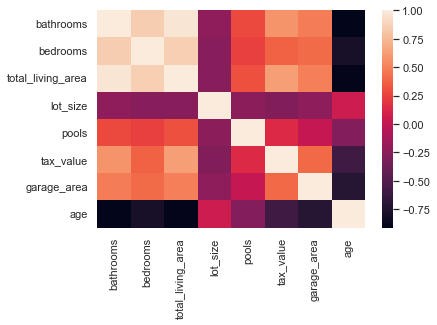

In [30]:
# Heatmap of cerrelation matrix

sns.heatmap(zillow_corr.corr())

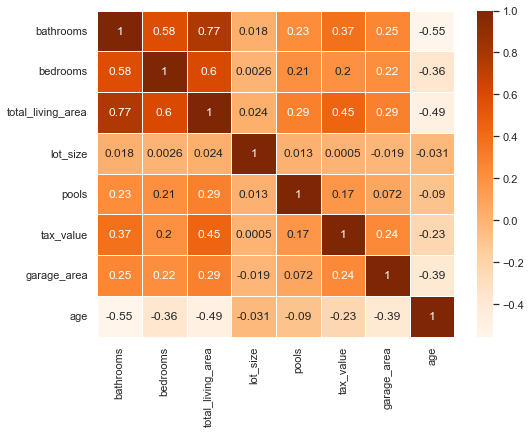

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Oranges', annot=True, linewidth=0.5)


plt.show()

In [32]:
train.corr()['tax_value'].sort_values()

age                 -0.228543
lot_size             0.000503
pools                0.172612
bedrooms             0.201151
garage_area          0.242408
bathrooms            0.373879
total_living_area    0.447028
tax_value            1.000000
Name: tax_value, dtype: float64

# Exploration Takeaways

- Tax value has negative correlation with the tax value of the house. It makes a sense as house get old, its value decreases in most of the cases but not always. We can say age of house is negative driver of tax value.

- Tax value has positive correlation with total_living_area, bathrooms, pools, bedrooms, garage_area, lot_size.

- Based on correlation heat map, we need to do statistical test on age of house and tax value of single family residential propertises only, but I have done with all of them.

- To ensure our finding from exploration we will do spearman r and pearson r stattistical tests on all of these attributes

###### Hypothesis:

- HO:total_living_area and tax_value has not linear relation.
- H1:total_living_area and tax_value has linear relation.

In [33]:
def pearsonr(col1, col2):
    α = 0.05
    corr, p = stats.pearsonr(train.total_living_area, train.tax_value)
    corr, p

    if p < α:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")
    print(p)

In [34]:
α = 0.05
corr, p = stats.pearsonr(train.total_living_area, train.tax_value)
corr, p

if p < α:
    print("We rejct the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)




We rejct the null hypothesis
0.0


In [35]:
α = 0.05
r, p_value = stats.spearmanr(train.total_living_area, train.tax_value)
r, p_value

if p_value < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p_value)



We reject the null hypothesis
0.0


Hypothesis:

- HO:bathrooms and tax_value has not linear relation.
- H1:bathrooms and tax_value has linear relation.

In [36]:
α = 0.05
corr, p = stats.pearsonr(train.bathrooms, train.tax_value)
corr, p

if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)


We reject the null hypothesis
0.0


In [37]:
α = 0.05
r, p_value = stats.spearmanr(train.bathrooms, train.tax_value)
r, p_value

if p_value < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p_value)


We reject the null hypothesis
0.0


Hypothesis:

- HO:pools and tax_value has not linear relation.
- H1:pools and tax_value has linear relation.

In [38]:
pearsonr(train.pools, train.tax_value)

We reject the null hypothesis
0.0


In [39]:
α = 0.05
r, p_value = stats.spearmanr(train.pools, train.tax_value)
r, p_value

if p_value < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p_value)

We reject the null hypothesis
2.0291844233374015e-164


Hypothesis:
- HO:bedrooms and tax_value has not linear relation.
- H1:bedroomss and tax_value has linear relation.

In [40]:
α = 0.05
corr, p = stats.pearsonr(train.bedrooms, train.tax_value)
corr, p

if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We reject the null hypothesis
6.228377991068913e-230


In [41]:
α = 0.05
r, p_value = stats.spearmanr(train.bedrooms, train.tax_value)
r, p_value

if p_value < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p_value)

We reject the null hypothesis
3.9501236597971652e-230


Hypothesis:
- HO:garage_area and tax_value has not linear relation.
- H1:garade_area tax_value has linear relation.

In [42]:
α = 0.05
corr, p = stats.pearsonr(train.garage_area, train.tax_value)
corr, p

if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We reject the null hypothesis
0.0


In [43]:
α = 0.05
r, p_value = stats.spearmanr(train.garage_area, train.tax_value)
r, p_value

if p_value < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p_value)

We reject the null hypothesis
0.0


Hypothesis:
- HO:lot_size and tax_value has not linear relation.
- H1:lot_size and tax_value has linear relation.

In [44]:
α = 0.05
corr, p = stats.pearsonr(train.lot_size, train.tax_value)
corr, p

if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We fail to reject the null hypothesis
0.9361089245924961


In [45]:
α = 0.05
r, p_value = stats.spearmanr(train.lot_size, train.tax_value)
r, p_value

if p_value < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p_value)

We reject the null hypothesis
1.5443145318421685e-10


### Use SelectKBest Feature Engineering to find features that have strong relationship y. 

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 6 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [47]:
f_feature

['bathrooms', 'bedrooms', 'total_living_area', 'pools', 'garage_area', 'age']

### Use Recursive Feature Engineering to find top 3 features

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(estimator=lm, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [49]:
rfe_feature

['bathrooms', 'bedrooms', 'pools']

### Modeling

In [50]:
df.shape

(45320, 8)

In [51]:
train, validate, test = pn.wrangle_zillow_split(df)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25379 entries, 34061 to 1256
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          25379 non-null  float64
 1   bedrooms           25379 non-null  float64
 2   total_living_area  25379 non-null  float64
 3   lot_size           25379 non-null  float64
 4   pools              25379 non-null  float64
 5   tax_value          25379 non-null  float64
 6   garage_area        25379 non-null  float64
 7   age                25379 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


In [ ]:
plt.hist(y_train)
plt.title('Distribution of Tax_Value')
plt.show()

In [ ]:
# a, b = baseline(y_train, y_validate)
# b.head()
# return y_train, y_validate

###### Baseline function has been defined in model_new.py. Calling that function to get our baseline RMSE

In [53]:
mn.baseline(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  243333.71 
Validate/Out-of-Sample:  246056.03
RMSE using Median
Train/In-Sample:  245764.58 
Validate/Out-of-Sample:  249250.61


###### We can say that both rmse on train and validate is low for mean than median. So we will take mean as our baseline.

###### Contents of baseline function

In [57]:
# Convert y_train and y_validate into a DataFrame
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Train Mean
pred_mean_train = y_train.tax_value.mean() 
y_train['tax_value_pred_mean'] = pred_mean_train

# Validate Mean
pred_mean_validate = y_validate.tax_value.mean() 
y_validate['tax_value_pred_mean'] = pred_mean_validate

 # Train Median
pred_median_train = y_train.tax_value.median() 
y_train['tax_value_pred_median'] = pred_median_train

# Validate Median
pred_median_validate = y_validate.tax_value.median() 
y_validate['tax_value_pred_median'] = pred_median_validate

# RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
  "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  243333.71 
Validate/Out-of-Sample:  246056.03
RMSE using Median
Train/In-Sample:  245764.58 
Validate/Out-of-Sample:  249250.61


In [58]:
 # Converting y to DataFrames
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

### Ordinary Least Squares (OLS)

- linear_regression(X_train, y_train, X_validate, y_validate) function is defined in model_new.py

In [60]:
mn.linear_regression(X_train, y_train, X_validate, y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  213583.92 
Validation/Out-of-Sample:  216968.08


### LASSO + LARS

- lasso_lars functions has been defined in model_new.py

In [61]:
# mn.lasso_lars(X_train, y_train, X_validate, y_validate, 0) # return y_validate # return y_validate


### alpha = 0

In [62]:
mn.lasso_lars(X_train, y_train, X_validate, y_validate, 0)

RMSE for Lasso + Lars
Training/In-Sample:  213583.92 
Validation/Out-of-Sample:  216968.08


### alpha = 0.001

In [63]:
mn.lasso_lars(X_train, y_train, X_validate, y_validate, 0.001)

RMSE for Lasso + Lars
Training/In-Sample:  213583.92 
Validation/Out-of-Sample:  216968.08


### alpha = 0.5

In [64]:
mn.lasso_lars(X_train, y_train, X_validate, y_validate, 0.5)

RMSE for Lasso + Lars
Training/In-Sample:  213584.11 
Validation/Out-of-Sample:  216968.05


### alpha = 1

In [65]:
mn.lasso_lars(X_train, y_train, X_validate, y_validate, 1)

RMSE for Lasso + Lars
Training/In-Sample:  213584.68 
Validation/Out-of-Sample:  216968.5


###### alpha = 2

In [66]:
mn.lasso_lars(X_train, y_train, X_validate, y_validate, 2)

RMSE for Lasso + Lars
Training/In-Sample:  213586.93 
Validation/Out-of-Sample:  216970.85


### TweedieRegressor (GLM)

- Tweedie_regressor function is defined in model_new.py

### power = 0, alpha = 0

In [67]:
mn.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 0, 0)

RMSE for GLM using Tweedie, power= 0  & alpha= 0 
Training/In-Sample:  217512.73 
Validation/Out-of-Sample:  219877.42


### power = 1, alpha = 0

In [68]:
mn.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 1, 0)

RMSE for GLM using Tweedie, power= 1  & alpha= 0 
Training/In-Sample:  243333.71 
Validation/Out-of-Sample:  246081.81


### power = 2, alpha = 0

In [69]:
mn.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 2, 0)

RMSE for GLM using Tweedie, power= 2  & alpha= 0 
Training/In-Sample:  243333.71 
Validation/Out-of-Sample:  246081.81


### power = 3, alpha = 0

In [70]:
mn.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 3, 0)

RMSE for GLM using Tweedie, power= 3  & alpha= 0 
Training/In-Sample:  243333.71 
Validation/Out-of-Sample:  246081.81


### Polynomial

- polynomial_regression(X_train, y_train, X_validate, y_validate, degree) function defined in model_new.py

### degree = 2

In [71]:
mn.polynomial_regression(X_train, y_train, X_validate, y_validate, 2)

RMSE for Polynomial Model, degrees= 2 
Training/In-Sample:  208506.8732209671 
Validation/Out-of-Sample:  213560.36107553466


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25379 entries, 34061 to 1256
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          25379 non-null  float64
 1   bedrooms           25379 non-null  float64
 2   total_living_area  25379 non-null  float64
 3   lot_size           25379 non-null  float64
 4   pools              25379 non-null  float64
 5   tax_value          25379 non-null  float64
 6   garage_area        25379 non-null  float64
 7   age                25379 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


### degree = 3

In [73]:
mn.polynomial_regression(X_train, y_train, X_validate, y_validate, 3)

RMSE for Polynomial Model, degrees= 3 
Training/In-Sample:  206966.9868777469 
Validation/Out-of-Sample:  487824.73557160096


### degree = 4

In [74]:
mn.polynomial_regression(X_train, y_train, X_validate, y_validate, 4)

RMSE for Polynomial Model, degrees= 4 
Training/In-Sample:  205609.09433856665 
Validation/Out-of-Sample:  24177633.546300955


### Modeling Takeways

- Best Features were 'bathrooms', 'total_living_area', 'pools'
- Best Model was Polynomial with degree 2.
- For baseline model, we choose to go with mean as its value of RMSE is less than that of median.
- Most of the model predict with better RMSE than baseline accuracy depednding upon the value of its paramteter.
- Some of the model gives less RMSE for train dataset but gives high RMSE for validation data set.
- More we clean the data, we will get model with less RMSE value.

### Evaluate

-Upon comparing RMSE value for various models, we found Polynomial with degree two has less RMSE value for both train and validate data set. So We will use this model to check RMSE for our test data set.

- polynomial_regression_test(X_train, y_train, X_validate, y_validate, X_test, y_test, 2) function has been defined in model_new.py that will help to get RMSE value for test dataset. RMSE for our test data come out as 211676.

In [76]:
mn.polynomial_regression_test(X_train, y_train, X_validate, y_validate, X_test, y_test, 2)

RMSE for Polynomial Model, degrees=2\Test:  211676 
Validation/Out-of-Sample:  213560.36107553466


### Ploting Tax Value of House vs Predicted Tax Value of House for validate dataset

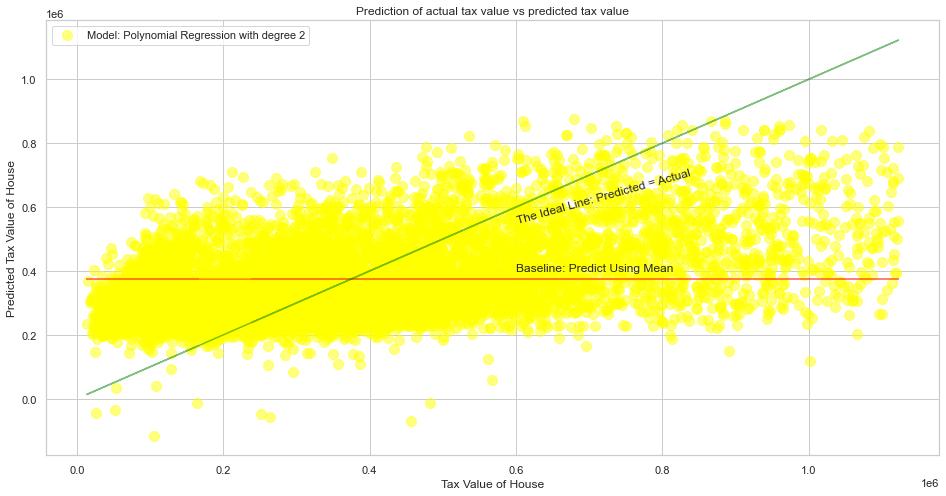

In [114]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (600000, 400000))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="green", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (600000, 550000), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, color="yellow", s=100, label="Model: Polynomial Regression with degree 2")
plt.legend()
plt.xlabel("Tax Value of House")
plt.ylabel("Predicted Tax Value of House")
plt.title("Prediction of actual tax value vs predicted tax value")

plt.show()

### Ploting Tax Value of House vs Predicted Tax Value of House for train dataset

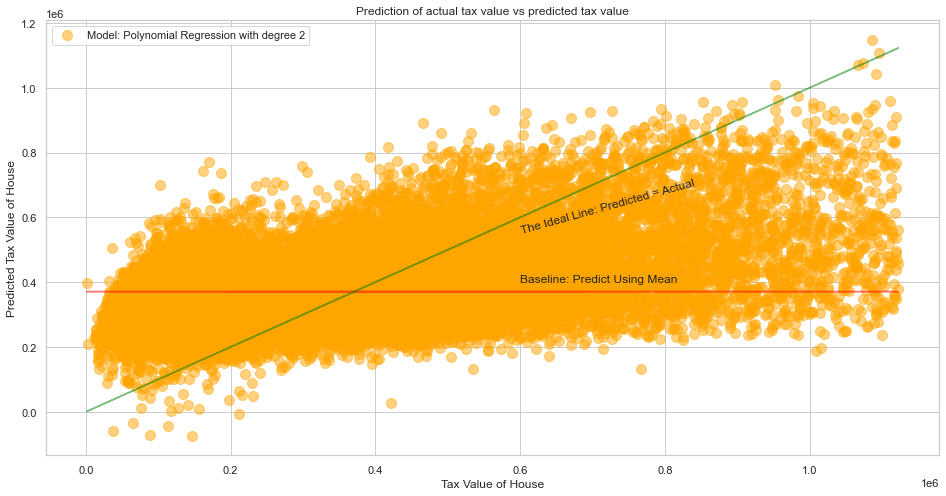

In [117]:
plt.figure(figsize=(16,8))
plt.plot(y_train.tax_value, y_train.tax_value_pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (600000, 400000))
plt.plot(y_train.tax_value, y_train.tax_value, alpha=.5, color="green", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (600000, 550000), rotation=15.5)

plt.scatter(y_train.tax_value, y_train.tax_value_pred_lm2, 
            alpha=.5, color="orange", s=100, label="Model: Polynomial Regression with degree 2")
plt.legend()
plt.xlabel("Tax Value of House")
plt.ylabel("Predicted Tax Value of House")
plt.title("Prediction of actual tax value vs predicted tax value")

plt.show()

# Conclusion: 

### We constructed OLS model, LASSO + LARS model, Tweedie Regression Model, Polynomial Regression model from help of sklearn library to check RMSE values of our cleaned data.

### Total Living Area, bedrooms, bathrooms, pools, garage_area and lot size are positive key drivers for the tax value of the single family residential properties.

### Feature Engineered attribute or I would say modified attritute 'age' was negative key drivers for the tax value of the single family resiedential properties.

### Among three county on data set, county with id = 3101 has low tax value for the single family residential properties and county with id = 1286 has high tax value for the single family residential properties.

### After modeling the zillow data using five features (bathrooms, bedrooms, total living area, lot size, pools and garage area), the Polynomial Model with degree 2 produced the best results with RMSE values of 208506, 211676 and 213560 for train, test and validate dataset. It is improvement by 14.3% over the baseline model (when comparing training data set). It was improved by 13.21 % for validate datadet. Therefore, these models do show that they could be used to produce a prediction for home values; however, the error is still high at over $215,129 RSME. I would recommed further cleaning data for a reliable predictor for tax value in order to use this model.

### If I have more time, I would clean the dataset for best result possible to reduce RMSE value for my models. I will give more time on exploration to find out other attributes for tax value of the single family residential properties that has transaction in 2017.